In [1]:
# Do a pip install for a few important packages 
import sys
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install gensim
!{sys.executable} -m pip install spacy

In [2]:
!{sys.executable} -m pip install pyLDAvis

In [3]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
# Import lots of useful packages...
import pandas as pd
import numpy as np
import os
import re
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel

import spacy

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

from wordcloud import WordCloud

from sklearn.datasets import fetch_20newsgroups

In [5]:
# Collect and extend stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#stops = set(stopwords.words('english'))
#print(stops)
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','a','about', 'above', 'across', 'just'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devmy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Stop words from kaggle notebook
st1= ['after', 'afterwards','again','against', 'all', 'almost','alone','along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides',
           'between',
           'beyond',
           'bill',
           'both',
           'bottom',
           'but',
           'by',
           'call',
           'can',
           'cannot',
           'cant',
           'co',
           'con',
           'could',
           'couldnt',
           'cry',
           'de',
           'describe',
           'detail',
           'do',
           'done',
           'down',
           'due',
           'during',
           'each',
           'eg',
           'eight',
           'either',
           'eleven',
           'else',
           'elsewhere',
           'empty',
           'enough',
           'etc',
           'even',
           'ever',
           'every',
           'everyone',
           'everything',
           'everywhere',
           'except',
           'few',
           'fifteen',
           'fifty',
           'fill',
           'find',
           'fire',
           'first',
           'five',
           'for',
           'former',
           'formerly',
           'forty',
           'found',
           'four',
           'from',
           'front',
           'full',
           'further',
           'get',
           'give',
           'go',
           'had',
           'has',
           'hasnt',
           'have',
           'he',
           'hence',
           'her',
           'here',
           'hereafter',
           'hereby',
           'herein',
           'hereupon',
           'hers',
           'herself',
           'him',
           'himself',
           'his',
           'how',
           'however',
           'hundred',
           'i',
           'ie',
           'if',
           'in',
           'im',
           'ive',
           'inc',
           'indeed',
           'interest',
           'into',
           'is',
           'it',
           'its',
           'itself',
           'keep',
           'last',
           'latter',
           'latterly',
           'least',
           'less',
           'ltd',
           'made',
           'many',
           'may',
           'me',
           'meanwhile',
           'might',
           'mill',
           'mine',
           'more',
           'moreover',
           'most',
           'mostly',
           'move',
           'much',
           'must',
           'my',
           'myself',
           'name',
           'namely',
           'neither',
           'never',
           'nevertheless',
           'next',
           'nine',
           'no',
           'nobody',
           'none',
           'noone',
           'nor',
           'not',
           'nothing',
           'now',
           'nowhere',
           'of',
           'off',
           'often',
           'on',
           'once',
           'one',
           'only',
           'onto',
           'or',
           'other',
           'others',
           'otherwise',
           'our',
           'ours',
           'ourselves',
           'out',
           'over',
           'own',
           'part',
           'per',
           'perhaps',
           'please',
           'put',
           'rather',
           're',
           'same',
           'see',
           'seem',
           'seemed',
           'seeming',
           'seems',
           'serious',
           'several',
           'she',
           'should',
           'show',
           'side',
           'since',
           'sincere',
           'six',
           'sixty',
           'so',
           'some',
           'somehow',
           'someone',
           'something',
           'sometime',
           'sometimes',
           'somewhere',
           'still',
           'such',
           'system',
           'take',
           'ten',
           'than',
           'that',
           'the',
           'their',
           'them',
           'themselves',
           'then',
           'thence',
           'there',
           'thereafter',
           'thereby',
           'therefore',
           'therein',
           'thereupon',
           'these',
           'they',
           'thick',
           'thin',
           'third',
           'this',
           'those',
           'though',
           'three',
           'through',
           'throughout',
           'thru',
           'thus',
           'to',
           'together',
           'too',
           'top',
           'toward',
           'towards',
           'twelve',
           'twenty',
           'two',
           'un',
           'under',
           'until',
           'up',
           'upon',
           'us',
           'very',
           'via',
           'was',
           'we',
           'well',
           'were',
           'what',
           'whatever',
           'when',
           'whence',
           'whenever',
           'where',
           'whereafter',
           'whereas',
           'whereby',
           'wherein',
           'whereupon',
           'wherever',
           'whether',
           'which',
           'while',
           'whither',
           'who',
           'whoever',
           'whole',
           'whom',
           'whose',
           'why',
           'will',
           'with',
           'within',
           'without',
           'would',
           'yet',
           'you',
           'your',
           'yours',
           'yourself',
           'yourselves']

In [7]:
stop_words.extend(st1)

In [8]:
st2 = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
       'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x',
       'y', 'z']

In [9]:
stop_words.extend(st2)

In [10]:
categories = [
    'sci.crypt',
    'sci.med',
    'sci.electronics',
    'sci.space'
]

In [11]:
data = fetch_20newsgroups(subset='all', categories=categories,
                         remove=('headers', 'footers', 'quotes'),
                         shuffle=False)

In [12]:
def normalize_whitespace(txt):
    '''Method to normalize newline and tab characters, quotes, and a [deletions] string from the posts'''
    if '\n' in txt: txt = txt.replace('\n', ' ')
    if '\t' in txt: txt = txt.replace('\t', ' ')
    if '[deletions]' in txt: txt = txt.replace('[deletions]', ' ')
    if '\'' in txt: txt = txt.replace('\'', '')
    if ':'  in txt: txt = txt.replace(':', '')
    if '-'  in txt: txt = txt.replace('-', ' ')
    if '\"' in txt: txt = txt.replace('\"', '')
    return txt

In [13]:
labels = data.target
labels
'''Label 0 = sci.crypt, label 1 = sci.med, label 2 = sci.electronics, '''

'Label 0 = sci.crypt, label 1 = sci.med, label 2 = sci.electronics, '

In [14]:
data_dict =  {'Labels': labels, 'Posts': data.data}
df = pd.DataFrame(data_dict)
df

,Labels,Posts
0,0,Archive-name: cryptography-faq/part10\nLast-mo...
1,2,Does anyone on this newsgroup happen to know W...
2,1,"Hi,\n\tI am looking for some help in choosing ..."
3,0,Does anyone know of a non-word password genera...
4,0,"The system, or 'family', key would appear to b..."
...,...,...
3947,2,Does anyone know of research done on the use o...
3948,0,\n\n\n\nThat's what MCI Mail is for! (CompuSe...
3949,3,\nYes! Just take money from the profitable co...
3950,1,\nThis has been an interesting thread to follo...


In [15]:
df['Labels'].value_counts()

0    991
2    990
3    987
1    984
Name: Labels, dtype: int64

In [16]:
column = df['Posts'].values # returns an array of the posts in the train dataframe
new_column, new_post = [], '', 
for post in column: 
    new_post = normalize_whitespace(post)
    new_column.append(new_post.lower())
df['Normalized Posts'] = new_column

In [17]:
df

,Labels,Posts,Normalized Posts
0,0,Archive-name: cryptography-faq/part10\nLast-mo...,archive name cryptography faq/part10 last modi...
1,2,Does anyone on this newsgroup happen to know W...,does anyone on this newsgroup happen to know w...
2,1,"Hi,\n\tI am looking for some help in choosing ...","hi, i am looking for some help in choosing a ..."
3,0,Does anyone know of a non-word password genera...,does anyone know of a non word password genera...
4,0,"The system, or 'family', key would appear to b...","the system, or family, key would appear to be ..."
...,...,...,...
3947,2,Does anyone know of research done on the use o...,does anyone know of research done on the use o...
3948,0,\n\n\n\nThat's what MCI Mail is for! (CompuSe...,thats what mci mail is for! (compuserve a...
3949,3,\nYes! Just take money from the profitable co...,yes! just take money from the profitable com...
3950,1,\nThis has been an interesting thread to follo...,this has been an interesting thread to follow...


In [18]:
df_copy = df.copy()

In [19]:
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

NUM_TOPICS = 4

# Converting the document to a matrix of token counts

vectorizer = CountVectorizer(min_df=5, max_df=0.9, 
                             stop_words=stop_words, lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')
data_vectorized = vectorizer.fit_transform(df['Normalized Posts'])

In [20]:
data_vectorized

<3952x7884 sparse matrix of type '<class 'numpy.int64'>'
	with 203562 stored elements in Compressed Sparse Row format>

In [21]:
# Make latent semantic indexing model
lsi_model = TruncatedSVD(n_components=NUM_TOPICS)
lsi_Z = lsi_model.fit_transform(data_vectorized)
print(lsi_Z.shape)

(3952, 4)


In [22]:
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
 
print("LSI Model:")
print_topics(lsi_model, vectorizer)
print("=" * 20)

LSI Model:
Topic 0:
[('privacy', 0.2033157359516588), ('internet', 0.19888675211430248), ('anonymous', 0.1968228860847727), ('information', 0.19604884403984002), ('space', 0.16432820755539432), ('new', 0.14018261038526805), ('email', 0.13285485165522143), ('pub', 0.12678082034353602), ('mail', 0.11796541681088193), ('eff', 0.10948090686379215)]
Topic 1:
[('space', 0.26781019154763697), ('earth', 0.14431752959208233), ('venus', 0.14295257424785265), ('spacecraft', 0.14013573980436012), ('solar', 0.13893003024143183), ('wire', 0.12893199023836713), ('surface', 0.12807959913620937), ('wiring', 0.12180794498603), ('planets', 0.12044246866755051), ('planet', 0.11482180684660477)]
Topic 2:
[('wire', 0.3638776081262775), ('wiring', 0.32744493784400597), ('neutral', 0.18422148173704034), ('ground', 0.18339239972590296), ('circuit', 0.15319523555208395), ('outlets', 0.14434924462449827), ('cable', 0.14087211536540542), ('nec', 0.1257216289431029), ('electrical', 0.11091033737767145), ('usually'

In [23]:
topics = ''
for idx, topic in enumerate(lsi_model.components_):
    print(f'Topic {idx}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-10-1:-1]])
    for i in topic.argsort()[:-10-1:-1]: 
        t = ' ' + str(vectorizer.get_feature_names()[i]) + ' '
        topics += t

Topic 0:
['privacy', 'internet', 'anonymous', 'information', 'space', 'new', 'email', 'pub', 'mail', 'eff']
Topic 1:
['space', 'earth', 'venus', 'spacecraft', 'solar', 'wire', 'surface', 'wiring', 'planets', 'planet']
Topic 2:
['wire', 'wiring', 'neutral', 'ground', 'circuit', 'outlets', 'cable', 'nec', 'electrical', 'usually']
Topic 3:
['hiv', 'health', 'cancer', 'medical', 'aids', 'patients', 'april', 'number', 'disease', 'newsletter']


In [24]:
print('Topics for the Latent Semantic Indexing Model')
for idx, topic in enumerate(lsi_model.components_):
    topic_list = f'Topic {idx}: '
    #print([vectorizer.get_feature_names()[i] for i in topic.argsort()[:-10-1:-1]])

    for i in topic.argsort()[:-10-1:-1]:
        topic_list +=  str(vectorizer.get_feature_names()[i]) + ' '
        #print(vectorizer.get_feature_names())
    print(topic_list)

Topics for the Latent Semantic Indexing Model
Topic 0: privacy internet anonymous information space new email pub mail eff 
Topic 1: space earth venus spacecraft solar wire surface wiring planets planet 
Topic 2: wire wiring neutral ground circuit outlets cable nec electrical usually 
Topic 3: hiv health cancer medical aids patients april number disease newsletter 


In [25]:
#for i in topic.argsort()[:-10-1:-1]: print(str(vectorizer.get_feature_names()[i])) 

In [26]:
topics.strip()

'privacy  internet  anonymous  information  space  new  email  pub  mail  eff  space  earth  venus  spacecraft  solar  wire  surface  wiring  planets  planet  wire  wiring  neutral  ground  circuit  outlets  cable  nec  electrical  usually  hiv  health  cancer  medical  aids  patients  april  number  disease  newsletter'

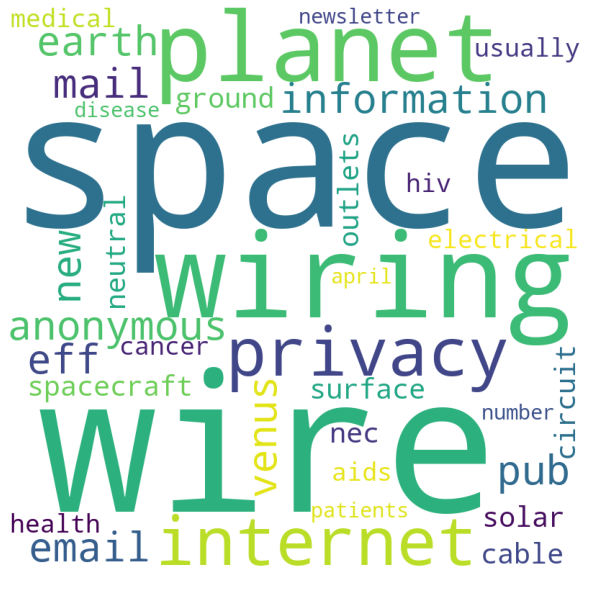

In [27]:
lsi_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(topics.strip())
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(lsi_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [28]:
# Pacakges for more visualization, snagged from Kaggle notebook
from sklearn.manifold import TSNE
# NLTK
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import re

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
import seaborn as sns

# Bokeh
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider
from bokeh.layouts import column
from bokeh.palettes import all_palettes
#output_notebook()

from bokeh.io import push_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, LabelSet
#output_notebook()

In [29]:
svd = TruncatedSVD(n_components=100)
words_2d = svd.fit_transform(data_vectorized.T)
 
wcdf = pd.DataFrame(columns=['x', 'y', 'word'])
wcdf['x'], wcdf['y'], wcdf['word'] = words_2d[:,0], words_2d[:,1], vectorizer.get_feature_names()
 
source = ColumnDataSource(ColumnDataSource.from_df(wcdf))
labels = LabelSet(x="x", y="y", text="word", y_offset=8,
                  text_font_size="8pt", text_color="#555555",
                  source=source, text_align='center')
 
plot = figure(plot_width=600, plot_height=600)
plot.circle("x", "y", size=12, source=source, line_color="black", fill_alpha=0.8)
plot.add_layout(labels)
show(plot, notebook_handle=True)

In [30]:
# Now try LDA

In [31]:
norm_df = df['Normalized Posts'].values.tolist()

In [32]:
# Split the normalized posts into individual words, while stripping punctuation
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

df_words = list(sent_to_words(norm_df))

In [33]:
# Create bi- and trigram models, taken from Kaggle

bigram = gensim.models.Phrases(df_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[df_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [34]:
# Lemmatizing and constructing bigrams and trigrams from the data, taken from Kaggle 
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [35]:
# Running the functions that were just created

data_words_nostops = remove_stopwords(df_words)

# Form Bigrams

data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [36]:
# Convert document set into a document-term matrix
id2word = corpora.Dictionary(data_lemmatized)
corpus = [id2word.doc2bow(text) for text in data_lemmatized] 

In [37]:
# Term frequency in the corpus
#[[(id2word[id], freq) for id, freq in cp] for cp in corpus[11:12]]

In [38]:
# Now, build the LDA model, code comes from Kaggle
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [39]:
# Print some keywords
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.012*"space" + 0.008*"earth" + 0.007*"planet" + 0.007*"battery" + '
  '0.006*"orbit" + 0.006*"launch" + 0.006*"spacecraft" + 0.005*"moon" + '
  '0.005*"mission" + 0.005*"solar"'),
 (1,
  '0.010*"patient" + 0.008*"drug" + 0.008*"doctor" + 0.007*"cause" + '
  '0.007*"disease" + 0.006*"study" + 0.006*"effect" + 0.005*"medical" + '
  '0.005*"health" + 0.005*"treatment"'),
 (2,
  '0.011*"know" + 0.011*"think" + 0.010*"use" + 0.008*"make" + 0.008*"key" + '
  '0.007*"time" + 0.007*"want" + 0.007*"say" + 0.007*"people" + 0.007*"thing"'),
 (3,
  '0.011*"information" + 0.007*"program" + 0.006*"public" + 0.006*"mail" + '
  '0.006*"include" + 0.005*"available" + 0.005*"computer" + 0.005*"issue" + '
  '0.004*"group" + 0.004*"address"')]


In [40]:
topics2 = ''
for idx in lda_model.show_topics(formatted=False):
    for j in idx:
        if type(j) == list:
            for tup in j:
                topics2 += ' ' + tup[0] + ' '
topics2

' space  earth  planet  battery  orbit  launch  spacecraft  moon  mission  solar  patient  drug  doctor  cause  disease  study  effect  medical  health  treatment  know  think  use  make  key  time  want  say  people  thing  information  program  public  mail  include  available  computer  issue  group  address '

In [41]:
print('Topics for the  Latent Dirichlet Allocation Model')
for idx in lda_model.show_topics(formatted=False):
    lda_topics_list = f'Topic {idx[0]}: '
    #print(idx)
    for j in idx:
        if type(j) == list:
            for tup in j:
                lda_topics_list += tup[0] + ' '
    print(lda_topics_list)

Topics for the  Latent Dirichlet Allocation Model
Topic 0: space earth planet battery orbit launch spacecraft moon mission solar 
Topic 1: patient drug doctor cause disease study effect medical health treatment 
Topic 2: know think use make key time want say people thing 
Topic 3: information program public mail include available computer issue group address 


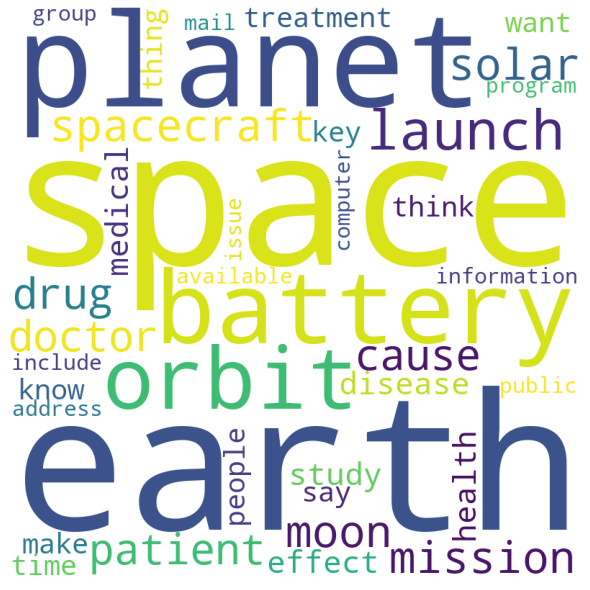

In [42]:
# Make a word cloud of lda topics
lda_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(topics2)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(lda_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [43]:
# Now, build an HDP model 

In [44]:
from gensim.models import CoherenceModel, HdpModel

In [45]:
hdp_model = HdpModel(corpus=corpus, id2word=id2word)

In [46]:
hdp_topics = hdp_model.show_topics(formatted=False)
hdp_topics

[(0,
  [('use', 0.005544189416692082),
   ('know', 0.004715343767350379),
   ('key', 0.004565299955087812),
   ('time', 0.004229322084336226),
   ('think', 0.003762125770575246),
   ('people', 0.0037148376298384374),
   ('say', 0.0034801568332772344),
   ('space', 0.003451688139387223),
   ('good', 0.003299734689000346),
   ('make', 0.0032838687063837507),
   ('work', 0.0030595682792648182),
   ('need', 0.0028337972659809264),
   ('want', 0.002823778992653194),
   ('thing', 0.0027619776476693627),
   ('year', 0.0027208293933764774),
   ('information', 0.0027113059044754314),
   ('new', 0.0026438589685811543),
   ('go', 0.002455641015768809),
   ('problem', 0.0024473243875038735),
   ('government', 0.0024298479251129586)]),
 (1,
  [('internet', 0.00429183180267449),
   ('information', 0.003411268079164719),
   ('user', 0.0033333229055861786),
   ('know', 0.0029667924400763445),
   ('privacy', 0.0028437857229136926),
   ('file', 0.002459279154656352),
   ('use', 0.0023507201275808384),
 

In [47]:
topics3 = ''
for idx in hdp_topics:
    #print(idx)
    for j in idx:
        if type(j)==list:
            for tup in j:
                topics3 += ' ' + tup[0] + ' '
topics3

' use  know  key  time  think  people  say  space  good  make  work  need  want  thing  year  information  new  go  problem  government  internet  information  user  know  privacy  file  use  mail  message  address  email  anonymous  encryption  computer  anonymity  people  make  network  key  site  time  know  space  say  pain  people  think  make  good  work  look  try  year  food  get  thing  shuttle  need  use  want  key  ripem  public  use  know  people  message  work  think  mail  encryption  say  post  time  standard  make  bit  security  encrypt  private  space  satellite  list  orbit  know  faq  key  information  word  post  thank  shuttle  mission  launch  hst  high  say  year  time  datum  key  encryption  chip  people  security  know  use  good  public  government  computer  patent  standard  think  information  say  surrender  chastity  jxp_skepticism  shameful  ground  amp  neutral  wire  current  circuit  run  use  people  case  line  panel  equipment  know  connect  con

In [48]:
print('Topics for the Hierarchical Dirichlet Model')
for idx in hdp_topics:
    hdp_topics_list = f'Topic {idx[0]}: '
    for j in idx:
        if type(j) == list:
            for tup in j:
                hdp_topics_list += tup[0] + ' '
    print(hdp_topics_list)

Topics for the Hierarchical Dirichlet Model
Topic 0: use know key time think people say space good make work need want thing year information new go problem government 
Topic 1: internet information user know privacy file use mail message address email anonymous encryption computer anonymity people make network key site 
Topic 2: time know space say pain people think make good work look try year food get thing shuttle need use want 
Topic 3: key ripem public use know people message work think mail encryption say post time standard make bit security encrypt private 
Topic 4: space satellite list orbit know faq key information word post thank shuttle mission launch hst high say year time datum 
Topic 5: key encryption chip people security know use good public government computer patent standard think information say surrender chastity jxp_skepticism shameful 
Topic 6: ground amp neutral wire current circuit run use people case line panel equipment know connect conductor grounding_conduct

In [49]:
len(topics3.split())
# 400 topics found using HDP

400

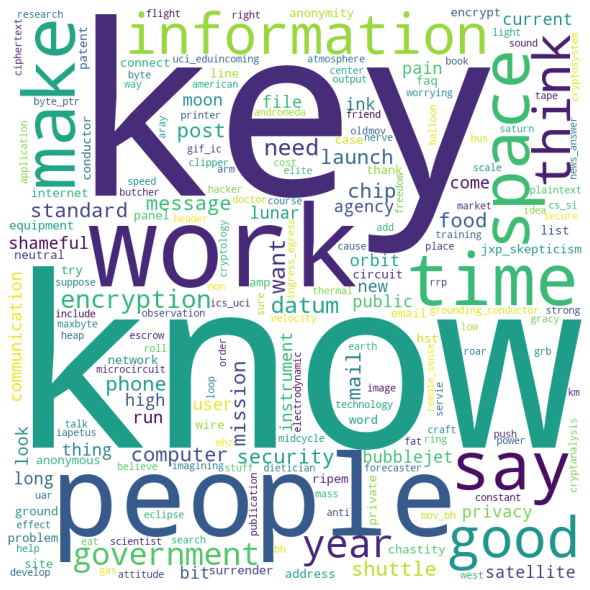

In [50]:
hdp_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(topics3)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(hdp_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [51]:
# Now, create a Non-negative Matrix Factorization model, code taken from Kaggle

In [52]:
from nltk.corpus import stopwords;
import nltk;
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer;
from sklearn.decomposition import NMF;
from sklearn.preprocessing import normalize;

vectorizer = CountVectorizer(analyzer='word', max_features=5000, stop_words=stop_words, lowercase=True, 
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}');
x_counts = vectorizer.fit_transform(norm_df);
print( "Created %d X %d document-term matrix" % (x_counts.shape[0], x_counts.shape[1]) )
transformer = TfidfTransformer(smooth_idf=False);
x_tfidf = transformer.fit_transform(x_counts);

Created 3952 X 5000 document-term matrix


In [53]:
terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 5000 distinct terms


In [54]:
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)
nmf_model = NMF(n_components=5, init='nndsvd');
nmf_model.fit(xtfidf_norm)

NMF(init='nndsvd', n_components=5)

In [55]:
def get_nmf_topics(model, n_top_words):
    
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [56]:
num_topics = 5
nmf_df = get_nmf_topics(nmf_model, 5)
nmf_df

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05
0,thanks,know,david,try,pitt
1,lot,good,nonsense,energy,geb
2,bunch,like,acid,sci,cadre
3,update,dont,joke,gov,shameful
4,advance,think,havent,pub,dsl
5,faq,space,sternlight,work,chastity
6,looking,people,nixon,sending,jxp
7,responses,tell,dont,photography,surrender
8,help,got,government,kirlian,skepticism
9,appreciate,key,read,vms,intellect


In [57]:
#df

In [58]:
#df_copy

In [59]:
raw_documents = df_copy['Normalized Posts'].str.strip()
raw_documents= raw_documents.str.lower()
raw_documents = raw_documents.tolist()
raw_doc1 = [i.split() for i in raw_documents]

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
# use a custom stopwords list, set the minimum term-document frequency to 20
vectorizer = CountVectorizer(stop_words = stop_words, min_df = 20) #custom_stop_words
A = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Created 3952 X 2611 document-term matrix


In [61]:
terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 2611 distinct terms


In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
# we can pass in the same preprocessing parameters
vectorizer = TfidfVectorizer(stop_words= stop_words, min_df = 20) #custom_stop_words
A = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d TF-IDF-normalized document-term matrix" % (A.shape[0], A.shape[1]) )

Created 3952 X 2611 TF-IDF-normalized document-term matrix


In [63]:
# Now, rank terms and build the model
import operator
def rank_terms( A, terms ):
    # get the sums over each column
    sums = A.sum(axis=0)
    # map weights to the terms
    weights = {}
    for col, term in enumerate(terms):
        weights[term] = sums[0,col]
    # rank the terms by their weight over all documents
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)

In [64]:
ranking = rank_terms( A, terms )
for i, pair in enumerate( ranking[0:20] ):
    print( "%02d. %s (%.2f)" % ( i+1, pair[0], pair[1] ) )

01. like (80.63)
02. know (78.74)
03. dont (77.88)
04. think (63.38)
05. people (61.62)
06. space (61.20)
07. key (56.09)
08. time (55.87)
09. good (55.77)
10. used (49.94)
11. thanks (47.98)
12. chip (46.73)
13. want (44.37)
14. information (43.40)
15. make (42.76)
16. government (42.66)
17. way (41.96)
18. new (41.92)
19. need (41.65)
20. right (41.11)


In [66]:
k = 4
# create the model
from sklearn import decomposition
model = decomposition.NMF( init="nndsvd", n_components=k ) 
# apply the model and extract the two factor matrices
W = model.fit_transform( A )
H = model.components_

In [79]:
H

array([[2.50184494e-02, 4.44476405e-02, 0.00000000e+00, ...,
        1.60145364e-01, 4.32383448e-02, 2.39037779e-02],
       [0.00000000e+00, 1.16985287e-02, 3.69505937e-05, ...,
        0.00000000e+00, 9.55574791e-03, 0.00000000e+00],
       [1.58373463e-03, 3.30039857e-03, 1.05749724e-03, ...,
        1.21474394e-02, 1.81515979e-02, 5.29971335e-03],
       [3.45598407e-02, 5.66293379e-02, 2.47719489e-02, ...,
        1.48388615e-02, 2.74946859e-03, 1.85423569e-02]])

In [67]:
def get_descriptor( terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms

In [94]:
descriptors = []
print('Topics for the NMF Model')
for topic_index in range(k):
    descriptors.append( get_descriptor( terms, H, topic_index, 10 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topics for the NMF Model
Topic 01: like, dont, know, people, think, good, time, thanks, want, work
Topic 02: geb, pitt, cadre, shameful, dsl, chastity, n3jxp, surrender, skepticism, intellect
Topic 03: key, chip, encryption, clipper, keys, government, escrow, algorithm, law, phone
Topic 04: space, nasa, shuttle, launch, orbit, program, moon, station, mission, earth


In [69]:
topics4 = ''
for i in descriptors:
    for j in i:
        topics4 += ' ' + j + ' '
topics4

' like  dont  know  people  think  good  time  thanks  want  work  geb  pitt  cadre  shameful  dsl  chastity  n3jxp  surrender  skepticism  intellect  key  chip  encryption  clipper  keys  government  escrow  algorithm  law  phone  space  nasa  shuttle  launch  orbit  program  moon  station  mission  earth '

In [81]:
import re
class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok )
            yield tokens

In [83]:
import gensim
docgen = TokenGenerator(raw_documents, stop_words )
w2v_model = gensim.models.Word2Vec(docgen, vector_size=500, min_count=20, sg=1)

Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...


In [89]:
def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            pair_scores.append( w2v_model.wv.similarity(pair[0], pair[1]))
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

In [90]:
import numpy as np
def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms

In [92]:
from itertools import combinations
term_rankings = []
for topic_index in range(k):
    term_rankings.append( get_descriptor( terms, H, topic_index, 10 ) )
# Now calculate the coherence based on our Word2vec model
#k_values.append( k )
nmf_coherence = calculate_coherence( w2v_model, term_rankings )
#print("K=%02d: Coherence=%.4f" % ( k, coherence ) )

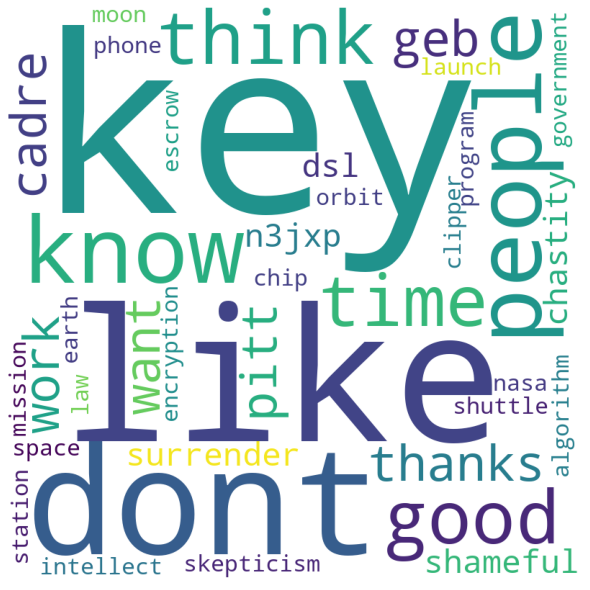

In [70]:
nmf_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(topics4)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(nmf_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [71]:
# Compare the techniques

In [72]:
lsi_model = LsiModel(corpus=corpus, num_topics=5, id2word=id2word)
lsi_topics = lsi_model.show_topics(formatted=False)

In [73]:
lda_topics = lda_model.show_topics(formatted=False)

In [74]:
lsi_topics = [[word for word, prob in topic] for topicid, topic in lsi_topics]

hdp_topics = [[word for word, prob in topic] for topicid, topic in hdp_topics]

lda_topics = [[word for word, prob in topic] for topicid, topic in lda_topics]

In [75]:
lsi_coherence = CoherenceModel(topics=lsi_topics[:10], texts=data_lemmatized, dictionary=id2word, window_size=10).get_coherence()

hdp_coherence = CoherenceModel(topics=hdp_topics[:10], texts=data_lemmatized, dictionary=id2word, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=lda_topics, texts=data_lemmatized, dictionary=id2word, window_size=10).get_coherence()

In [76]:
lsi_coherence

0.33487152926482644

In [77]:
hdp_coherence

0.3027835619498632

In [78]:
lda_coherence

0.5273807850530741

In [93]:
print("K=%02d: Coherence=%.4f" % ( k, nmf_coherence ) )

K=04: Coherence=0.6549
